In [1]:
import pandas as pd
import os

import matplotlib
from matplotlib import pyplot as plt

%matplotlib notebook
plt.style.use('ggplot')

#### Load Data (from git@github.com:pcm-dpc/COVID-19.git)

In [2]:
df_list = []

workdir = "../data/italy/dati-province"
for filename in os.listdir(workdir):
    filepath = os.path.join(workdir, filename)
    with open(filepath, 'r') as file_data:
        current_df = pd.read_csv(filepath)
        df_list.append(current_df)
        
df = pd.concat(df_list)

#### DB CleanUp and Basic Improvements

In [3]:
df.dropna(inplace=True)

df['data'] = pd.to_datetime(df['data'])

df = df.groupby(['sigla_provincia', 'data']).agg({
    'denominazione_regione': 'first',
    'totale_casi': 'max',
    
}).reset_index()

df.set_index(['sigla_provincia', 'data'], inplace=True)
df.sort_index(inplace=True)

df['casi_day'] = df.groupby(level=0)['totale_casi'].transform(lambda x: x - x.shift(1))

## Italian Provinces rank (or selection)

In [4]:
# Here you can select the list of provinces to show

# ... as a TOP#N
top_list = df.groupby(level=0)['totale_casi'].max().sort_values(ascending=False).head(10).index

# ... or as a custom list
# top_list = ['BG', 'BS', 'VR', 'MI']

<IPython.core.display.Javascript object>


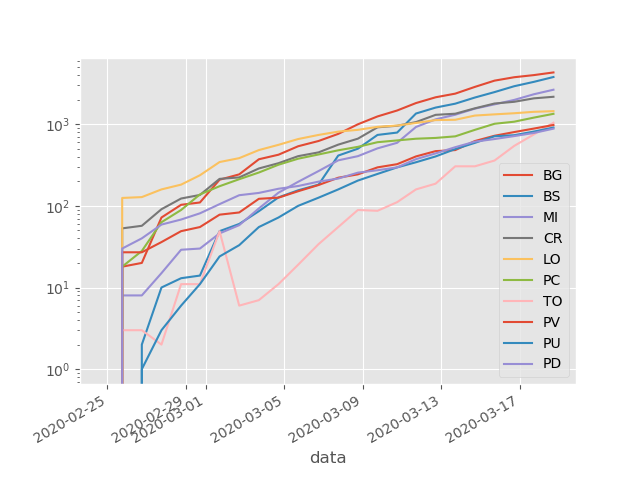

In [5]:
ax = plt.figure(1).subplots(1)

for index, provincia in enumerate(top_list):
    df.loc[provincia].plot(ax=ax, y='totale_casi', label=provincia)

ax.set_yscale('log')

## Compare Provinces (Region-by-Region)

<IPython.core.display.Javascript object>


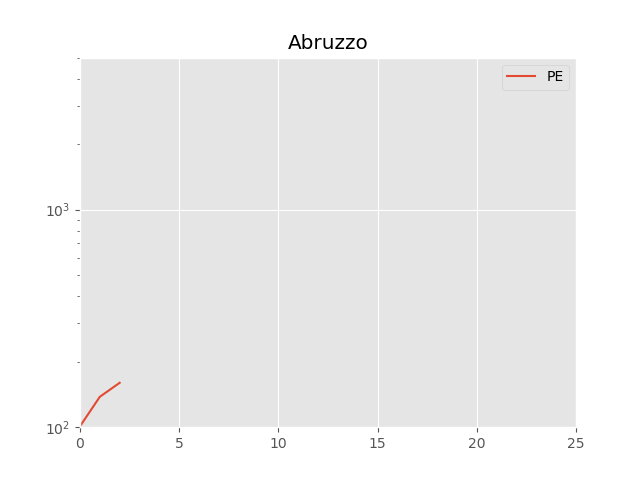

<IPython.core.display.Javascript object>


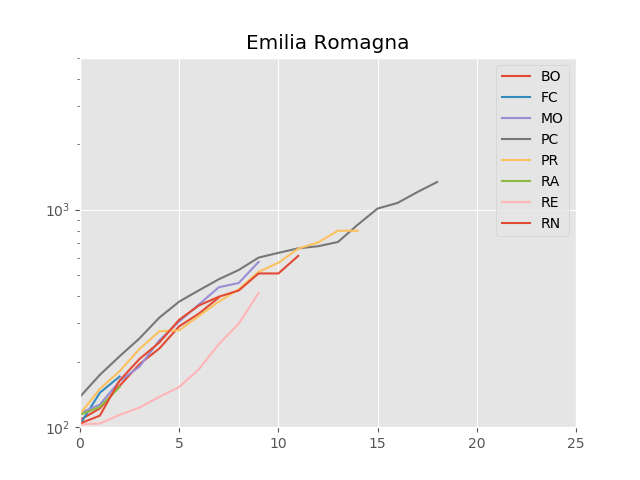

<IPython.core.display.Javascript object>


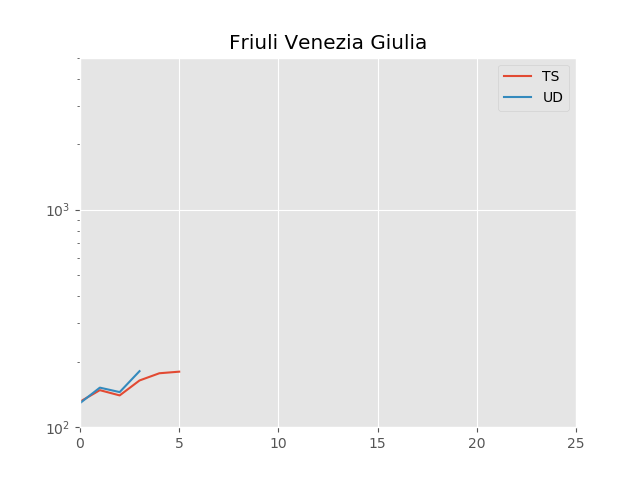

<IPython.core.display.Javascript object>


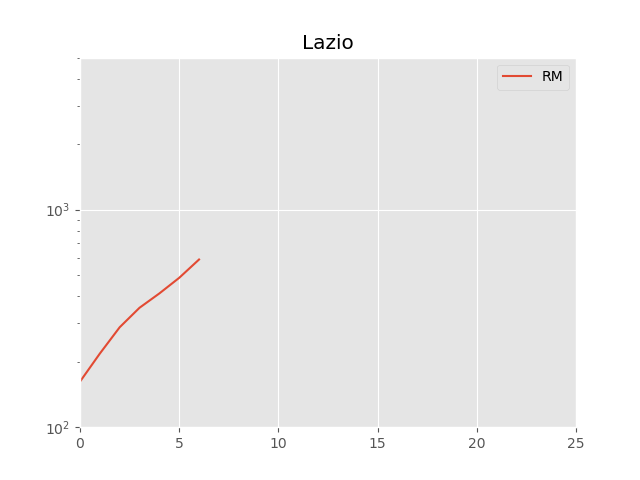

<IPython.core.display.Javascript object>


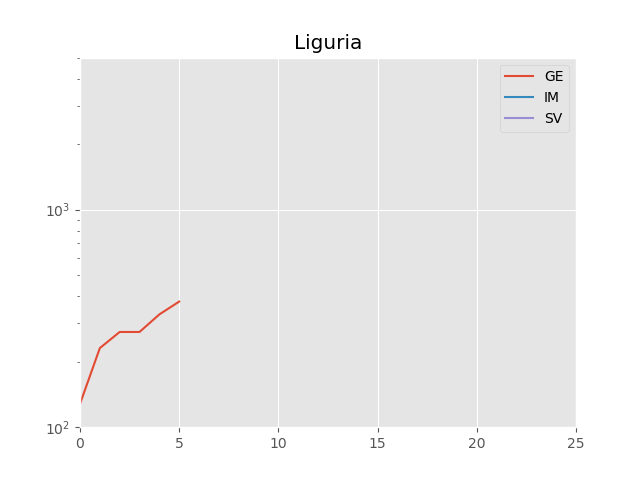

<IPython.core.display.Javascript object>


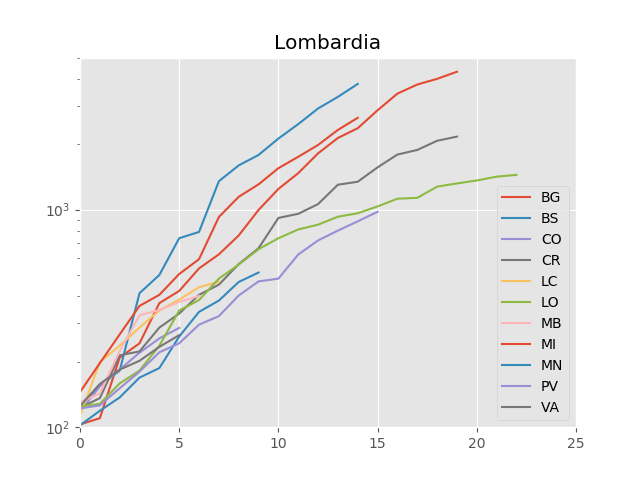

<IPython.core.display.Javascript object>


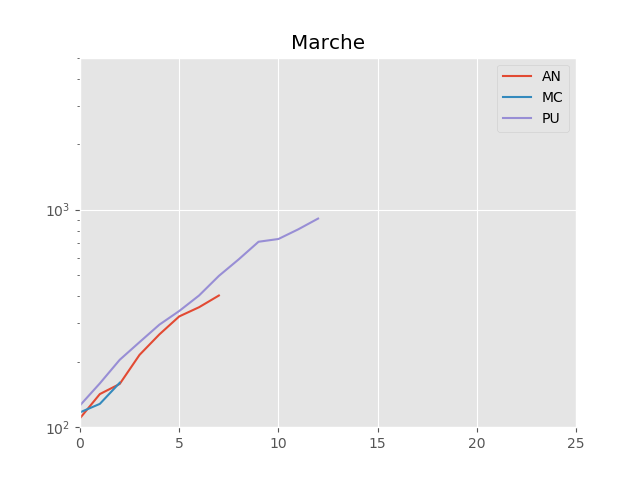

<IPython.core.display.Javascript object>


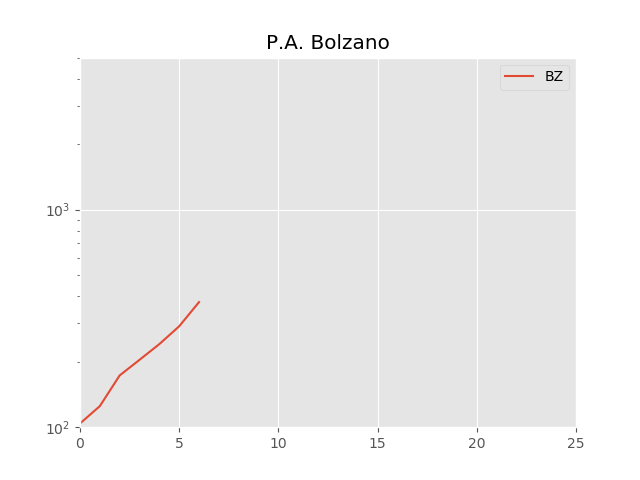

<IPython.core.display.Javascript object>


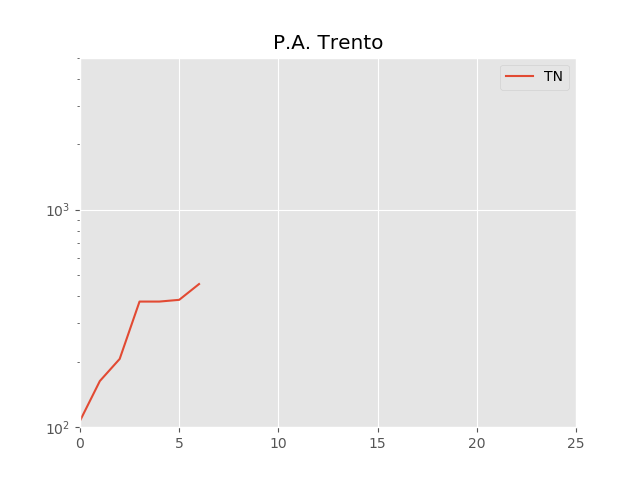

<IPython.core.display.Javascript object>


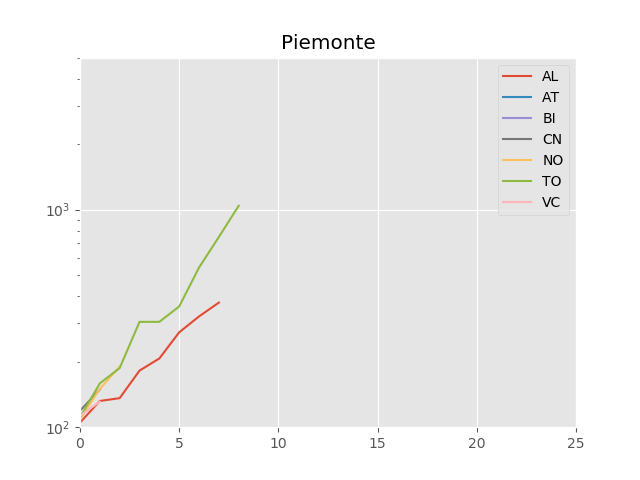

<IPython.core.display.Javascript object>


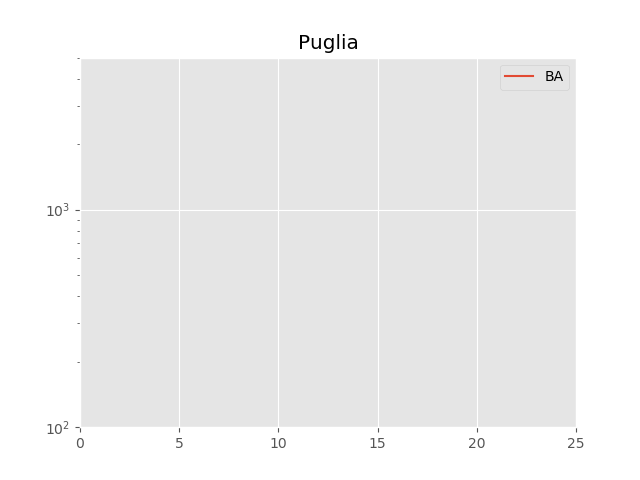

<IPython.core.display.Javascript object>


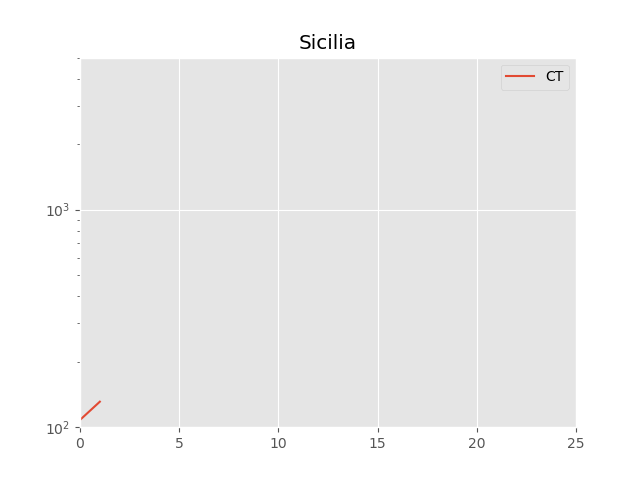

<IPython.core.display.Javascript object>


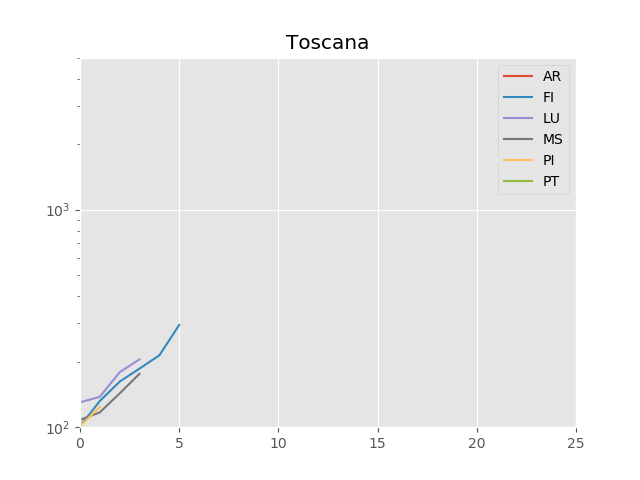

<IPython.core.display.Javascript object>


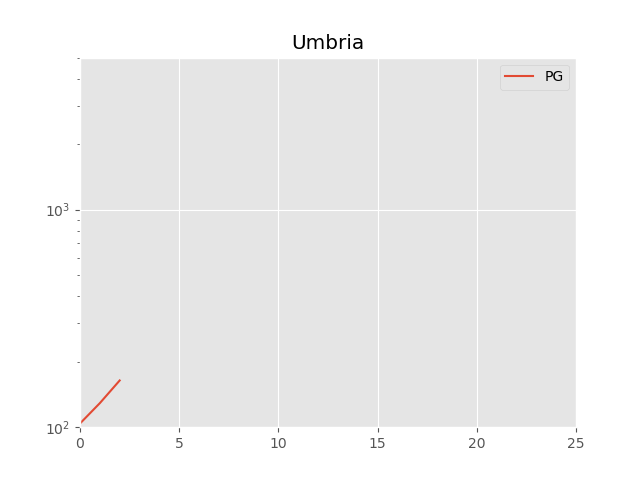

<IPython.core.display.Javascript object>


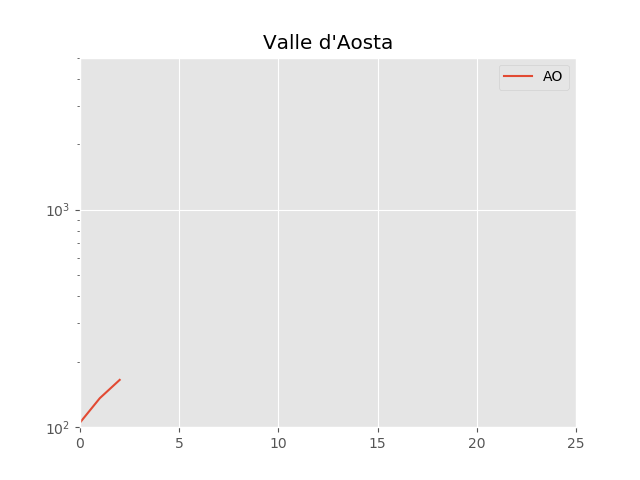

<IPython.core.display.Javascript object>


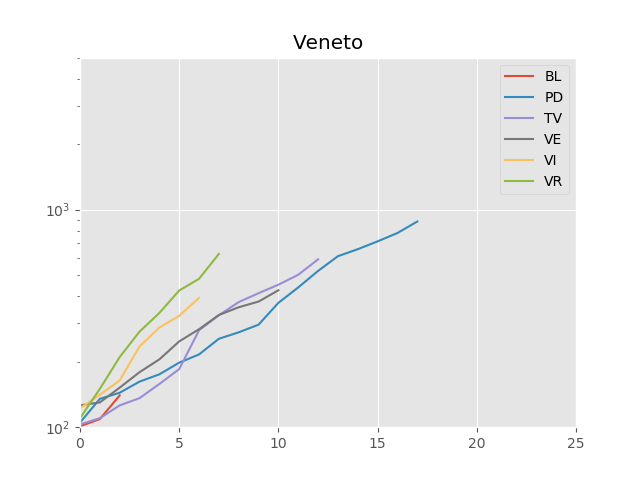

In [6]:
df_plus100 = df[df['totale_casi'] > 100]

for index, (regione, regione_data) in enumerate(df_plus100.groupby('denominazione_regione')):    
    fig, ax = plt.subplots(1)
    
    for provincia, provincia_data in regione_data.groupby(level=0):
        provincia_data.loc[provincia].reset_index().plot(ax=ax, y='totale_casi', label=provincia)
    
    ax.set_title(regione)
    ax.set_yscale('log')
    ax.set_xlim(0, 25)
    ax.set_ylim(1e2, 5e3)